<a href="https://colab.research.google.com/github/shanaka-desoysa/notes/blob/main/docs/Finance/Calculate_Composite_Rate_for_Series_I_Bonds_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate Composite Rate for Series I Savings Bonds (I Bonds) using CPI




## Install Packages

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader.fred import FredReader

## Download CPI Data from FRED

Download Consumer Price Index for All Urban Consumers - Not Seasonaly Adjusted [CPIAUCNS](https://fred.stlouisfed.org/series/CPIAUCNS).

In [2]:
end_date = pd.to_datetime('today').date()
start_date = (end_date + pd.DateOffset(years=-5)).date()

print(f'start_date: {start_date} to end_date: {end_date}')

start_date: 2017-05-12 to end_date: 2022-05-12


In [3]:
df = FredReader('CPIAUCNS', start=start_date).read()

In [4]:
df

,CPIAUCNS
DATE,
2017-06-01,244.955
2017-07-01,244.786
2017-08-01,245.519
2017-09-01,246.819
2017-10-01,246.663
2017-11-01,246.669
2017-12-01,246.524
2018-01-01,247.867
2018-02-01,248.991


## Plot CPI Data

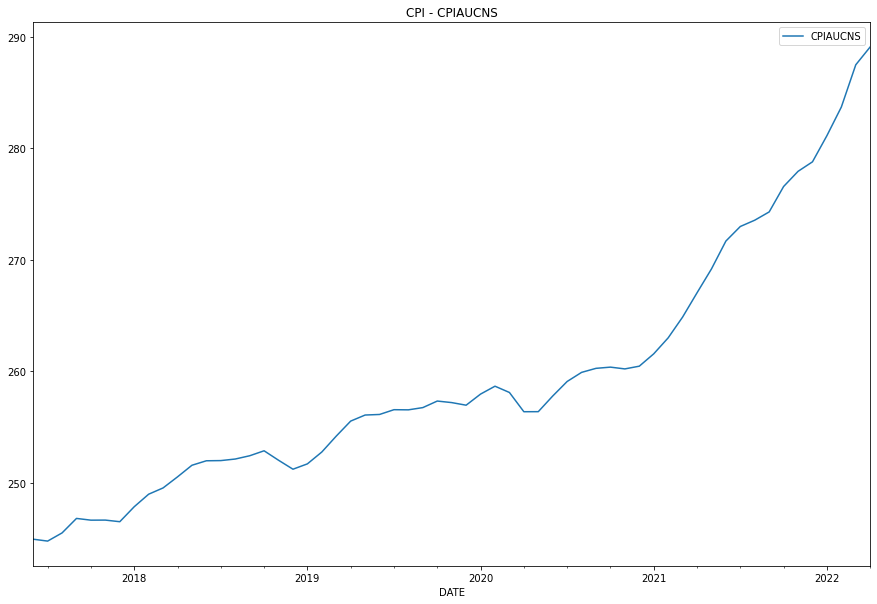

In [5]:
df.plot(title='CPI - CPIAUCNS', figsize=(15,10));

## Calculate Percent Change

In [6]:
df['CPIAUCNS-1m'] = df['CPIAUCNS'].shift(periods=1)
df['CPIAUCNS-6m'] = df['CPIAUCNS'].shift(periods=6)
df['CPIAUCNS-12m'] = df['CPIAUCNS'].shift(periods=12)
df

,CPIAUCNS,CPIAUCNS-1m,CPIAUCNS-6m,CPIAUCNS-12m
DATE,,,,
2017-06-01,244.955,NaN,NaN,NaN
2017-07-01,244.786,244.955,NaN,NaN
2017-08-01,245.519,244.786,NaN,NaN
2017-09-01,246.819,245.519,NaN,NaN
2017-10-01,246.663,246.819,NaN,NaN
2017-11-01,246.669,246.663,NaN,NaN
2017-12-01,246.524,246.669,244.955,NaN
2018-01-01,247.867,246.524,244.786,NaN
2018-02-01,248.991,247.867,245.519,NaN


Composite Rate is 6 months percentage change multiplied by 2 (annualized).

In [7]:
df['percent_change_1m'] = (df['CPIAUCNS'] - df['CPIAUCNS-1m'])*100 / df['CPIAUCNS-1m']
df['percent_change_6m'] = (df['CPIAUCNS'] - df['CPIAUCNS-6m'])*100 / df['CPIAUCNS-6m']
df['percent_change_12m'] = (df['CPIAUCNS'] - df['CPIAUCNS-12m'])*100 / df['CPIAUCNS-12m']

# Composite Rate
df['percent_change_6m_annualized'] = df['percent_change_6m'] *2
df

,CPIAUCNS,CPIAUCNS-1m,CPIAUCNS-6m,CPIAUCNS-12m,percent_change_1m,percent_change_6m,percent_change_12m,percent_change_6m_annualized
DATE,,,,,,,,
2017-06-01,244.955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,244.786,244.955,NaN,NaN,-0.068992,NaN,NaN,NaN
2017-08-01,245.519,244.786,NaN,NaN,0.299445,NaN,NaN,NaN
2017-09-01,246.819,245.519,NaN,NaN,0.529491,NaN,NaN,NaN
2017-10-01,246.663,246.819,NaN,NaN,-0.063204,NaN,NaN,NaN
2017-11-01,246.669,246.663,NaN,NaN,0.002432,NaN,NaN,NaN
2017-12-01,246.524,246.669,244.955,NaN,-0.058783,0.640526,NaN,1.281052
2018-01-01,247.867,246.524,244.786,NaN,0.544775,1.258650,NaN,2.517301
2018-02-01,248.991,247.867,245.519,NaN,0.453469,1.414147,NaN,2.828294


## Composite Rate
Following we can see the composite rate based on the latest CPI data.

In [8]:
composite_rate = df.iloc[-1]['percent_change_6m_annualized'].round(2)
latest_CPI_date = df.iloc[-1].name.date()

print(f'Latest CPI Date: {latest_CPI_date}, Composite Rate: {composite_rate}%')

Latest CPI Date: 2022-04-01, Composite Rate: 9.05%


## Plot Percent Changes over Time

In [9]:
# pct_columns = ['percent_change_1m', 'percent_change_6m', 'percent_change_12m', 'percent_change_6m_annualized']
pct_columns = ['percent_change_6m_annualized']

In [10]:
df[pct_columns].tail(12)

,percent_change_6m_annualized
DATE,
2021-05-01,6.890854
2021-06-01,8.616599
2021-07-01,8.732252
2021-08-01,8.024668
2021-09-01,7.122551
2021-10-01,7.140878
2021-11-01,6.503093
2021-12-01,5.230846
2022-01-01,5.966967


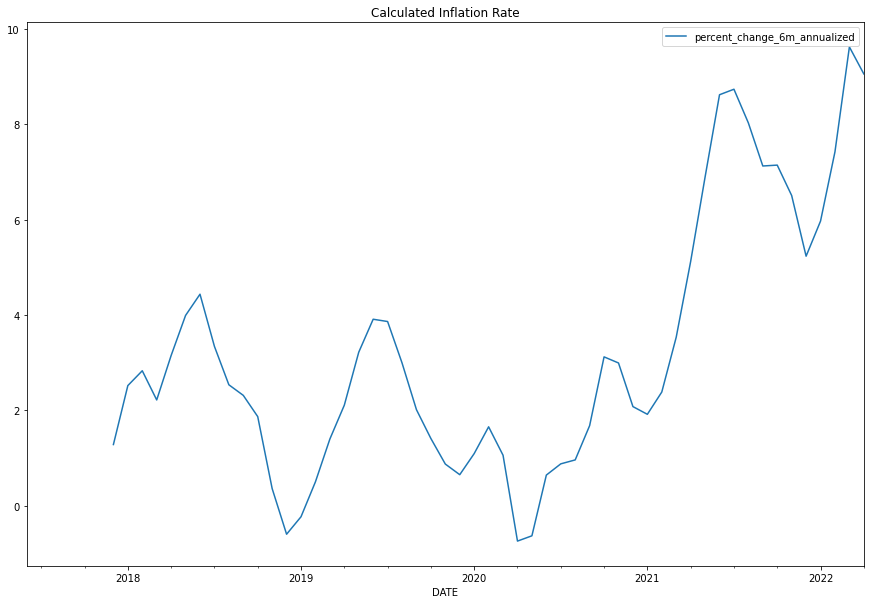

In [11]:
df[pct_columns].plot(title='Calculated Inflation Rate', figsize=(15, 10));

In [12]:
# from IPython.display import HTML
# import plotly.express as px

# df_plot = df[pct_columns].reset_index().dropna()

In [13]:
# fig = px.line(df_plot, x='DATE', y="percent_change_6m_annualized", title="Calculated Inflation Rate")
# fig.show()
# HTML(
# div = fig.to_html(full_html=False)
# )

In [14]:
# HTML(div)

In [15]:
# import plotly
# labels = ['Oxygen', 'Hydrogen', 'Carbon_Dioxide', 'Nitrogen']
# values = [4500, 2500, 1053, 500]

# trace = plotly.graph_objs.Pie(labels=labels, values=values)
# plotly.offline.plot([fig], filename='chart')

In [16]:
# %cat basic-pie-chart.html

In [17]:
# %%HTML
# basic-pie-chart.html